In [1]:
import requests as req
!pip install oauthlib
!pip install requests_oauthlib
from oauthlib.oauth2 import MobileApplicationClient
from requests_oauthlib import OAuth2Session
from oauthlib.oauth2 import BackendApplicationClient
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
url = "https://api.yelp.com/v3/businesses/search"

In [2]:
client_id = 'G5xpoUQV8dUq8bL2KQZGnQ'
client_secret = 'mHLQsY6gyBiuT6YviJYzFazV7i4WGQR28PLhWzh21AmYbgQJV0lfyfVhkrMIONi5'

In [3]:
client = BackendApplicationClient(client_id=client_id)
oauth = OAuth2Session(client=client)
token = oauth.fetch_token(token_url='https://api.yelp.com/oauth2/token', client_id=client_id,
        client_secret=client_secret)
print("ACCESS TOKEN: " + token['access_token'])
tok = token['access_token']
# url_params = {
#               'term': 'deli', 
#               'location': 'Mission District, San Francisco',
#               'limit': 50
#              }
# url = "https://api.yelp.com/v3/businesses/search"
# headers = {
#     'Authorization': 'Bearer %s' % tok,
# # }
# busn = req.get(url, headers=headers, params=url_params)

ACCESS TOKEN: 7pJig_NPk4rUhim9wWkULRt0-7RFCdJmPJL7W8PmfUlQHOZMyH3UFxInvm7l4u2-KeT7eChQ1D-6GiN-GJnnI4cszIxIXV0GDNwMUmYnkyWkZzpAQ5pMBFDqbr6hWXYx


In [4]:
# print(busn.json())
# dels = busn.json()

# for x in dels['businesses']:
#     print(json.dumps(x['name'], sort_keys=True, indent=4))


In [5]:
Districts = ["Castro District", "Chinatown", "Ternderloin", "Inner Richmond", "Inner Sunset", "Alamo Square", "Russian Hill", "Mission District", "NorthBeach/Telegraph", "SoMa"]

types = ["Chinese", "Mexican", "French", "Japanese", "Mediterranean", "American", "Italian", "Korean", "Thai", "Indian"]

priceByType = {}
priceByHood = {}

for x in Districts:
    districts = {}
    for y in types:
        
        url_params = {
            'term': y,
            'location': x,
            'limit': 50
        }
        
        headers = {
            'Authorization': 'Bearer %s' % tok
        }
        
        call = req.get(url, headers=headers, params=url_params)
        jcall = call.json()
        for price in jcall['businesses']:
            try:
                money = price['price']
                if money not in districts:
                    districts[money]=1
                else:
                    districts[money]+=1
            except:
                continue
    priceByHood[x] = districts

print(priceByHood)

{'Castro District': {'$$': 313, '$': 102, '$$$$': 11, '$$$': 48}, 'Chinatown': {'$': 102, '$$': 309, '$$$': 74, '$$$$': 12}, 'Ternderloin': {'$$': 297, '$': 132, '$$$': 45, '$$$$': 20}, 'Inner Richmond': {'$$': 326, '$': 112, '$$$': 44, '$$$$': 14}, 'Inner Sunset': {'$$': 233, '$': 147, '$$$': 10, '$$$$': 2}, 'Alamo Square': {'$': 69, '$$': 241, '$$$$': 21, '$$$': 35}, 'Russian Hill': {'$$': 300, '$': 126, '$$$$': 16, '$$$': 49}, 'Mission District': {'$': 109, '$$': 310, '$$$': 58, '$$$$': 18}, 'NorthBeach/Telegraph': {'$$': 219, '$': 113, '$$$$': 14, '$$$': 46}, 'SoMa': {'$$': 295, '$': 124, '$$$': 50, '$$$$': 22}}


In [6]:
for x in types:
    types = {}
    for y in Districts:
        
        url_params = {
            'term': x,
            'location': y,
            'limit': 50
        }
        
        headers = {
            'Authorization': 'Bearer %s' % tok
        }
        
        call = req.get(url, headers=headers, params=url_params)
        jcall = call.json()
        for price in jcall['businesses']:
            try:
                money = price['price']
                if money not in types:
                    types[money]=1
                else:
                    types[money]+=1
            except:
                continue
    priceByType[x] = types

print(priceByType)

{'Chinese': {'$$': 238, '$': 234, '$$$': 9, '$$$$': 6}, 'Mexican': {'$$': 230, '$': 240, '$$$$': 4, '$$$': 16}, 'French': {'$$$': 153, '$$': 200, '$$$$': 43, '$': 25}, 'Japanese': {'$$': 356, '$$$': 49, '$$$$': 54, '$': 36}, 'Mediterranean': {'$': 140, '$$': 202, '$$$': 36}, 'American': {'$$$': 60, '$$': 350, '$': 68, '$$$$': 14}, 'Italian': {'$$$': 79, '$$': 343, '$': 65, '$$$$': 12}, 'Korean': {'$$': 349, '$': 93, '$$$$': 13, '$$$': 24}, 'Thai': {'$$': 360, '$': 108, '$$$': 8}, 'Indian': {'$$': 216, '$': 127, '$$$': 24, '$$$$': 4}}


In [7]:
priceByHoodDF=pd.DataFrame.from_records(priceByHood).reset_index().rename(columns={'index':'Hood'}).set_index('Hood').T
priceByHoodDFIndex = priceByHoodDF.index.values
priceByHoodDF2=priceByHoodDF.reset_index()
priceByHoodDF2.columns = ['index','Cheap','Not Expensive','Expensive','Super Expensive']
priceByHoodDF2
# 

,index,Cheap,Not Expensive,Expensive,Super Expensive
0,Alamo Square,69,241,35,21
1,Castro District,102,313,48,11
2,Chinatown,102,309,74,12
3,Inner Richmond,112,326,44,14
4,Inner Sunset,147,233,10,2
5,Mission District,109,310,58,18
6,NorthBeach/Telegraph,113,219,46,14
7,Russian Hill,126,300,49,16
8,SoMa,124,295,50,22
9,Ternderloin,132,297,45,20


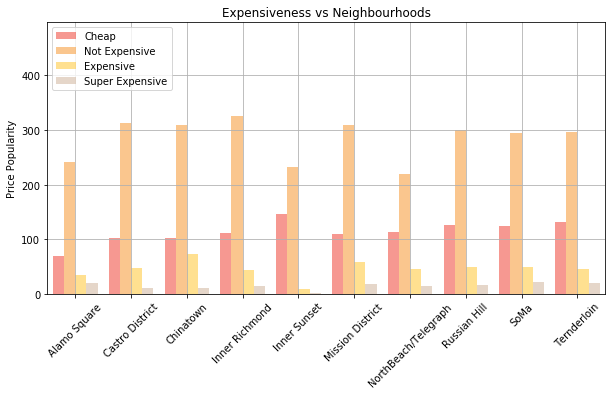

In [8]:
# Setting the positions and width for the bars

pos = list(range(len(priceByHoodDF2['Cheap'])))
width = 0.20

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# fig=plt.figure(1,[15,6])
# ax = fig.add_subplot(111)

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        priceByHoodDF2['Cheap'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#EE3224',
        # with label the first value in first_name
        label=priceByHoodDF2['index'][0])

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        priceByHoodDF2['Not Expensive'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F78F1E',
        # with label the second value in first_name
        label=priceByHoodDF2['index'][1])

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos],
        #using df['post_score'] data,
        priceByHoodDF2['Expensive'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#FFC222',
        # with label the third value in first_name
        label=priceByHoodDF2['index'][2])

plt.bar([p + width*3 for p in pos],
        #using df['post_score'] data,
        priceByHoodDF2['Super Expensive'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#cdaf95',
        # with label the third value in first_name
        label=priceByHoodDF2['index'][3])



# Set the y axis label
ax.set_ylabel('Price Popularity')

# Set the chart's title
ax.set_title('Expensiveness vs Neighbourhoods')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(priceByHoodDF2['index'])

for label in ax.get_xticklabels():
    label.set_rotation(45) 




# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(priceByHoodDF2['Cheap'] + priceByHoodDF2['Not Expensive'] + priceByHoodDF2['Expensive'] + priceByHoodDF2['Super Expensive'])] )

# Adding the legend and showing the plot
plt.legend(['Cheap', 'Not Expensive', 'Expensive','Super Expensive'], loc='upper left')
plt.grid()
plt.show()

In [9]:
priceByTypeDF=pd.DataFrame.from_records(priceByType).reset_index().rename(columns={'index':'Type'}).set_index('Type').T.reset_index()
priceByTypeDF.columns = ['Type','Cheap','Not Expensive','Expensive','Super Expensive']
priceByTypeDF

,Type,Cheap,Not Expensive,Expensive,Super Expensive
0,American,68.0,350.0,60.0,14.0
1,Chinese,234.0,238.0,9.0,6.0
2,French,25.0,200.0,153.0,43.0
3,Indian,127.0,216.0,24.0,4.0
4,Italian,65.0,343.0,79.0,12.0
5,Japanese,36.0,356.0,49.0,54.0
6,Korean,93.0,349.0,24.0,13.0
7,Mediterranean,140.0,202.0,36.0,NaN
8,Mexican,240.0,230.0,16.0,4.0
9,Thai,108.0,360.0,8.0,NaN


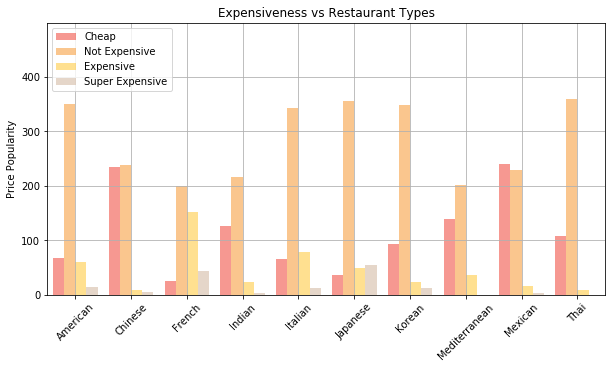

In [10]:
# Setting the positions and width for the bars

pos = list(range(len(priceByTypeDF['Cheap'])))
width = 0.20

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# fig=plt.figure(1,[15,6])
# ax = fig.add_subplot(111)

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        priceByTypeDF['Cheap'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#EE3224',
        # with label the first value in first_name
        label=priceByTypeDF['Type'][0])

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        priceByTypeDF['Not Expensive'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F78F1E',
        # with label the second value in first_name
        label=priceByTypeDF['Type'][1])

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos],
        #using df['post_score'] data,
        priceByTypeDF['Expensive'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#FFC222',
        # with label the third value in first_name
        label=priceByTypeDF['Type'][2])

plt.bar([p + width*3 for p in pos],
        #using df['post_score'] data,
        priceByTypeDF['Super Expensive'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#cdaf95',
        # with label the third value in first_name
        label=priceByTypeDF['Type'][3])



# Set the y axis label
ax.set_ylabel('Price Popularity')

# Set the chart's title
ax.set_title('Expensiveness vs Restaurant Types')

# Set the position of the x ticks
ax.set_xticks([p +1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(priceByTypeDF['Type'])

for label in ax.get_xticklabels():
    label.set_rotation(45) 



# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(priceByTypeDF['Cheap'] + priceByTypeDF['Not Expensive'] + priceByTypeDF['Expensive'] + priceByTypeDF['Super Expensive'])] )

# Adding the legend and showing the plot
plt.legend(['Cheap', 'Not Expensive', 'Expensive','Super Expensive'], loc='upper left')
plt.grid()
plt.show()